# Alex Barkovitch Project #3
## Sentiment Analysis of Reviews
### 4/18/2024
## For this project, I will be performing sentiment analysis on reviews using Yelp Fusion API. I will collect reviews for nightclubs in New York and determine their sentiment, displaying a donut chart that displays the amount of positive, negative, and neutral reviews. I will compare the results of the default Textblob analyzer to the results of the NaiveBayesAnalyzer, and display a WordCloud of the top 20 words that appear throughout the reviews analyzed. Questions I will ask about this dataset are: What is the average review for nightclubs in New York? What are the names of the top rated clubs, and what category are they?

In [1]:
"""
Assignment Directions:

In a Jupyter Notebook, perform sentiment analysis on reviews using an API such as Yelp Fusion.

Your analysis should include the following:

Introduction (in Markdown): an overall question that you have about your dataset, along with your name and date and description of the problem and summary of your solution.
Use the API to search for at least 60 reviews about your topic. (Note Yelp Fusion only delivers 3 reviews per business.)
Clean your reviews as needed.
Perform sentiment analysis on these reviews, displaying a donut chart of the positive, negative, and neutral percentages. Use the default Textblob analyzer and then compare it with the results of the NaiveBayesAnalyzer.
Delete the stop words from the reviews using the NLTK library stop-words lists.
Display a WordCloud of the top 20 words used in the reviews you cleaned.
Conclusion (in Markdown): include insights that you learned from this analysis.
Submit: a link to your GitHub repository containing your Notebook file.
"""

'\nAssignment Directions:\n\nIn a Jupyter Notebook, perform sentiment analysis on reviews using an API such as Yelp Fusion.\n\nYour analysis should include the following:\n\nIntroduction (in Markdown): an overall question that you have about your dataset, along with your name and date and description of the problem and summary of your solution.\nUse the API to search for at least 60 reviews about your topic. (Note Yelp Fusion only delivers 3 reviews per business.)\nClean your reviews as needed.\nPerform sentiment analysis on these reviews, displaying a donut chart of the positive, negative, and neutral percentages. Use the default Textblob analyzer and then compare it with the results of the NaiveBayesAnalyzer.\nDelete the stop words from the reviews using the NLTK library stop-words lists.\nDisplay a WordCloud of the top 20 words used in the reviews you cleaned.\nConclusion (in Markdown): include insights that you learned from this analysis.\nSubmit: a link to your GitHub repository c

In [2]:
import yelpkeys  # file with professors client_id and api_key
import json # to format API data
import requests # to work with HTTP
import pandas as pd

from textblob import TextBlob # for sentiment analysis
from textblob.sentiments import NaiveBayesAnalyzer
from operator import itemgetter # for getting top 20 words


# following imports are for data visualization
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns 
import matplotlib.pyplot as plt

# natural language processing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from operator import itemgetter


import urllib
from urllib.parse import quote # to encode path as UTF-8

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Set variables for the API key, API host, search path, and search parameters
### For this project, I'll be looking up reviews for nightclubs in New York, so those will be my search term and location

In [3]:
# Yelp Fusion API key
API_KEY= yelpkeys.api_key


# API host website
API_HOST = 'https://api.yelp.com'
# path to concatenate to API_HOST to search business reviews for this project
SEARCH_PATH = '/v3/businesses/search'

# query parameters that will be passed into url_params dictionary
SEARCH_TERM = 'nightlife' # search term
SEARCH_LOCATION = 'New York, NY' # area to search within
SEARCH_LIMIT = 30 # limit amount of searches


### The following functions are used to pull data for from the Yelp Fusion API. I will be using them to pull reviews for different businesses.

In [4]:
# request function looks at the host and returns a json response from the request as a dictionary
def request(host, path, api_key, url_params=None):    
    # dictionary of query parameters
    url_params = url_params or {} 
    # format the url: concatenate the api host and search path
    url = '{0}{1}'.format(host, quote(path.encode('utf8'))) # encode path in UTF-8
    # authenticate API calls with the API Key by setting the Authorization HTTP header value as Bearer API_KEY
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    print(u'API Query: {0} ...'.format(url))    
    # goes out to the internet and uses the request method
    response = requests.request('GET', url, headers=headers, params=url_params) 
    # converts json of the response to a dictionary
    return response.json()


In [5]:
# use search term and location to search API
def search(api_key, term, location):
    # set search parameters for the search term, location, and limit
    url_params = {
        'term': term.replace(' ', '+'), #search term
        'location': location.replace(' ', '+'), #search location
        'limit': SEARCH_LIMIT #search limit
    }
    # return the json dictionary from the request function
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params) 

### Create a dictionary that contains a list of dictionaries. 
### The dictionary contains a list of businesses. Each business has a dictionary which contains the data gathered from the search function.

In [6]:
#search businesses that match the query parameters set in url_params
result = search(API_KEY, SEARCH_TERM, SEARCH_LOCATION)

API Query: https://api.yelp.com/v3/businesses/search ...


In [7]:
#display output for response
result

{'businesses': [{'id': '511OTzlr0FkL4esfBxMzIw',
   'alias': 'rooftop-93-new-york-5',
   'name': 'Rooftop 93',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/6DsZdx49o3ZpL-BJ5YPmWw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/rooftop-93-new-york-5?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 384,
   'categories': [{'alias': 'lounges', 'title': 'Lounges'},
    {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
   'rating': 4.1,
   'coordinates': {'latitude': 40.71705, 'longitude': -73.99522},
   'transactions': ['delivery'],
   'price': '$$',
   'location': {'address1': '93 Bowery',
    'address2': '',
    'address3': '',
    'city': 'New York',
    'zip_code': '10002',
    'country': 'US',
    'state': 'NY',
    'display_address': ['93 Bowery', 'New York, NY 10002']},
   'phone': '+12129669033',
   'display_phone': '(212) 966-9033',
   'distance

### Loop through each list in the result dictionary and pull out name, category, rating, review count, and reviews for each business. To get the reviews, substitute business ID in the endpoint name. Perform sentiment analysis and display if the review was positive, negative, or neutral.

In [8]:
# create sentiment dictionary for our plot
sentiment_dict = {'positive' : 0, 'neutral' : 0, 'negative' : 0}
naive_dict = {'positive' : 0, 'neutral' : 0, 'negative' : 0}

# create lists for reviews and summary
review_list = []
summary_list = []

# pull out individual values from original response
for business in result['businesses']:
    # locate and print values for name, categories, 
    # rating, review count, and reviews for each business
    print('Business Name: ' + business['name']) # print value in name column
    category_list = [] # need to create an empty list to access nested elements
    for i in business['categories']: # loop through keys in category to find each title
        category_list.append(i['title']) # append to list to display multiple titles together
    print('Category: ', category_list) # print the list
    print('Rating: ' + str(business['rating'])) # print value in rating column
    print('Review Count: ' + str(business['review_count'])) # print value in review_count column
    print('Reviews: ') # just print reviews for now because they're under a different api link
    
    # add to our summary dictionary so we can analyze the most popular category
    summary = {'Name' : business['name'], 'Category' : category_list, 'Rating' : business['rating']}
    summary_list.append(summary)

    # use format to substitute curly braces with id field from business entry in response dictionary
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id']) 
    print('URL: https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    
    # start a new request to query api for the reviews of each business id
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    
    # loop through the reviews for each business
    for review in reviews['reviews']:
        # append each review to a list so we can get total word counts for all businesses
        review_list.append(review['text'])
        # print the review
        print('Review:\n' + review['text'])
        
        # turn the review into a textblob for default sentiment
        blob = TextBlob(review['text'])
        # make another textblob using NaiveBayesAnalyzer for sentiment
        naive_blob = TextBlob(review['text'], analyzer=NaiveBayesAnalyzer())
        # determine the default sentiment for each review and print result
        # add positive, negative, or neutral value to dictionary for visualization
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            sentiment_dict['positive'] += 1
            print('\nDefault Sentiment: Positive')
        elif sentiment < 0:
            sentiment_dict['negative'] += 1
            print('\nDefault Sentiment: Negative')
        else:
            sentiment_dict['neutral'] += 1
            print('\nDefault Sentiment: Neutral')
        # determine NaiveBayesAnalyzer sentiment and print result
        naive_sentiment = naive_blob.sentiment.classification
        if naive_sentiment == 'pos':
            naive_dict['positive'] += 1
            print('NaiveBayesAnalyzer Sentiment: Positive\n\n')
        elif naive_sentiment == 'neg':
            naive_dict['negative'] += 1
            print('NaiveBayesAnalyzer Sentiment: Negative\n\n')
        else:
            naive_dict['neutral'] += 1
            print('NaiveBayesAnalyzer Sentiment: Neutral\n\n')

    print('\n\n-----------------------------------------------\n\n')

Business Name: Rooftop 93
Category:  ['Lounges', 'Cocktail Bars']
Rating: 4.1
Review Count: 384
Reviews: 
URL: https://api.yelp.com/v3/businesses/511OTzlr0FkL4esfBxMzIw/reviews?limit=20&sort_by=yelp_sort
API Query: https://api.yelp.com/v3/businesses/511OTzlr0FkL4esfBxMzIw/reviews ...
Review:
This is my favorite rooftop in the city and I found it only after writing off all rooftops since the experience with places like Le Bain has completely...

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Negative


Review:
Came in last Saturday night. The place does have some good views and is very spacious, however one of the bartenders working  that night made the whole...

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Positive


Review:
Great cute rooftop bar in the LES. If you wanna take people visiting NY you can take them here for a quick drink and a view of the Empire State Building....

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Positive




------------

Review:
Came here in the middle of the week an we just missed a hidden comedy show. 

The bar was super spacious and had a lot of games. From ping pong to...

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Positive


Review:
Searched for an active bar and what a great, cool place. We arrived right when happy hour started. Perfect timing. We got our drinks and went upstairs where...

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Positive


Review:
Very cute place! Celebrated my birthday here last night with friends. Yes, the games are free with the exception of Skeeball, which is $1/game. Besides...

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Positive




-----------------------------------------------


Business Name: Space Ping Pong Lounge & Bar
Category:  ['Sports Clubs', 'Lounges', 'Arcades']
Rating: 4.2
Review Count: 63
Reviews: 
URL: https://api.yelp.com/v3/businesses/vgKdXghv-rJpjho_6uD6zg/reviews?limit=20&sort_by=yelp_sort
API Query: https:/

Review:
Went here after dinner downstairs at Gage & Tollner. It was packed even on a Wednesday evening at 10pm. It is so cute inside. Love all the ship themed...

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Positive


Review:
This bar is so unexpected, so fun! Located right next to the subway station, this little gem is on the second floor of an Uber posh restaurant. It plays the...

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Negative


Review:
It's taken me quite some time to visit Sunken Harbor as location is not ideal for me but happy to finally have paid a visit! As a Queens native, Sunken...

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Positive




-----------------------------------------------


Business Name: Harriet's Rooftop
Category:  ['Lounges', 'Cocktail Bars']
Rating: 3.2
Review Count: 274
Reviews: 
URL: https://api.yelp.com/v3/businesses/9sU8ceKHiqNrLBMRM-aUkg/reviews?limit=20&sort_by=yelp_sort
API Query: https://api.yelp.com/v3

NaiveBayesAnalyzer Sentiment: Positive


Review:
House Of Yes is such a gorgeous place to attend an event. I went to a burlesque show there, several nights ago. The atmosphere was dark, velvety and...

Default Sentiment: Positive
NaiveBayesAnalyzer Sentiment: Positive




-----------------------------------------------


Business Name: HiLot
Category:  ['Cocktail Bars']
Rating: 4.3
Review Count: 19
Reviews: 
URL: https://api.yelp.com/v3/businesses/X58AqNiJFs5QT5DOOV85KQ/reviews?limit=20&sort_by=yelp_sort
API Query: https://api.yelp.com/v3/businesses/X58AqNiJFs5QT5DOOV85KQ/reviews ...
Review:
Overall rating: 4.9 

I am absolutely obsessed with this place, even though it was soo expensive. Come when you have money. For 4 cocktails with tip, it was...

Default Sentiment: Negative
NaiveBayesAnalyzer Sentiment: Positive


Review:
We stopped in here for after work drinks and it was a dream. A pseudo speakeasy, you step through an unsuspecting door into a gorgeous old hollywood style...

Defa

### We will take the list of all the reviews and join them together, sending the text into a textblob to remove stop words and get word counts

In [9]:
# display list with the reviews for all businesses
review_list

['This is my favorite rooftop in the city and I found it only after writing off all rooftops since the experience with places like Le Bain has completely...',
 'Came in last Saturday night. The place does have some good views and is very spacious, however one of the bartenders working  that night made the whole...',
 'Great cute rooftop bar in the LES. If you wanna take people visiting NY you can take them here for a quick drink and a view of the Empire State Building....',
 'No photos, as your phones get sealed in an envelope, but this is all I thought it would be!\n\nThe Village Underground is an extension of the famous Comedy...',
 'What a great experience- no joke.\n\nThis is a great venue for showcase comedy instead of a headliner. Sure, sometimes you want the whole box of Lucky Charms,...',
 "to start, i've been to better comedy shows in the middle of nowhere. Seemed like a very commercialized experience, they pack the shit out of the venue,...",
 'Fun vibes! Always came here for

In [10]:
# join the list items together into a single item
review_list = ''.join(map(str, review_list))
review_list

'This is my favorite rooftop in the city and I found it only after writing off all rooftops since the experience with places like Le Bain has completely...Came in last Saturday night. The place does have some good views and is very spacious, however one of the bartenders working  that night made the whole...Great cute rooftop bar in the LES. If you wanna take people visiting NY you can take them here for a quick drink and a view of the Empire State Building....No photos, as your phones get sealed in an envelope, but this is all I thought it would be!\n\nThe Village Underground is an extension of the famous Comedy...What a great experience- no joke.\n\nThis is a great venue for showcase comedy instead of a headliner. Sure, sometimes you want the whole box of Lucky Charms,...to start, i\'ve been to better comedy shows in the middle of nowhere. Seemed like a very commercialized experience, they pack the shit out of the venue,...Fun vibes! Always came here for the roof top atmosphere and i

In [11]:
# textblob with text from the reviews of all businesses
blob = TextBlob(review_list)
blob

TextBlob("This is my favorite rooftop in the city and I found it only after writing off all rooftops since the experience with places like Le Bain has completely...Came in last Saturday night. The place does have some good views and is very spacious, however one of the bartenders working  that night made the whole...Great cute rooftop bar in the LES. If you wanna take people visiting NY you can take them here for a quick drink and a view of the Empire State Building....No photos, as your phones get sealed in an envelope, but this is all I thought it would be!

The Village Underground is an extension of the famous Comedy...What a great experience- no joke.

This is a great venue for showcase comedy instead of a headliner. Sure, sometimes you want the whole box of Lucky Charms,...to start, i've been to better comedy shows in the middle of nowhere. Seemed like a very commercialized experience, they pack the shit out of the venue,...Fun vibes! Always came here for the roof top atmosphere a

In [12]:
# set and display english stop words
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
# count all items in the textblob
items = blob.word_counts.items()
print('Reviews With Stopwords:\n' + str(items))

Reviews With Stopwords:
dict_items([('this', 30), ('is', 39), ('my', 21), ('favorite', 2), ('rooftop', 5), ('in', 36), ('the', 113), ('city', 5), ('and', 73), ('i', 55), ('found', 2), ('it', 37), ('only', 5), ('after', 8), ('writing', 1), ('off', 2), ('all', 7), ('rooftops', 1), ('since', 2), ('experience', 6), ('with', 24), ('places', 1), ('like', 8), ('le', 1), ('bain', 1), ('has', 3), ('completely', 1), ('came', 9), ('last', 4), ('saturday', 3), ('night', 11), ('place', 20), ('does', 1), ('have', 7), ('some', 11), ('good', 16), ('views', 4), ('very', 9), ('spacious', 2), ('however', 2), ('one', 7), ('of', 44), ('bartenders', 5), ('working', 1), ('that', 13), ('made', 3), ('whole', 3), ('great', 24), ('cute', 3), ('bar', 19), ('les', 1), ('if', 9), ('you', 24), ('wan', 2), ('na', 2), ('take', 4), ('people', 5), ('visiting', 2), ('ny', 1), ('can', 4), ('them', 2), ('here', 23), ('for', 43), ('a', 103), ('quick', 1), ('drink', 8), ('view', 2), ('empire', 1), ('state', 1), ('building', 

In [14]:
# remove stopwords from the review items
items = [item for item in items if item[0] not in stop_words]
# print the reviews without stopwords
print('Reviews Without Stopwords:\n' + str(items))

Reviews Without Stopwords:
[('favorite', 2), ('rooftop', 5), ('city', 5), ('found', 2), ('writing', 1), ('rooftops', 1), ('since', 2), ('experience', 6), ('places', 1), ('like', 8), ('le', 1), ('bain', 1), ('completely', 1), ('came', 9), ('last', 4), ('saturday', 3), ('night', 11), ('place', 20), ('good', 16), ('views', 4), ('spacious', 2), ('however', 2), ('one', 7), ('bartenders', 5), ('working', 1), ('made', 3), ('whole', 3), ('great', 24), ('cute', 3), ('bar', 19), ('les', 1), ('wan', 2), ('na', 2), ('take', 4), ('people', 5), ('visiting', 2), ('ny', 1), ('quick', 1), ('drink', 8), ('view', 2), ('empire', 1), ('state', 1), ('building', 1), ('photos', 1), ('phones', 1), ('get', 4), ('sealed', 1), ('envelope', 1), ('thought', 2), ('would', 3), ('village', 2), ('underground', 1), ('extension', 1), ('famous', 1), ('comedy', 4), ('joke', 1), ('venue', 5), ('showcase', 1), ('instead', 1), ('headliner', 1), ('sure', 2), ('sometimes', 1), ('want', 3), ('box', 2), ('lucky', 1), ('charms', 1

In [15]:
# sort items from most used to least used words
sort_words = sorted(items, key=itemgetter(1), reverse=True)
sort_words

[('great', 24),
 ('place', 20),
 ('bar', 19),
 ('fun', 19),
 ('drinks', 19),
 ('good', 16),
 ('time', 15),
 ("n't", 14),
 ('night', 11),
 ('went', 11),
 ('came', 9),
 ('like', 8),
 ('drink', 8),
 ('music', 8),
 ('cool', 8),
 ('friends', 8),
 ('one', 7),
 ('birthday', 7),
 ('service', 7),
 ('little', 7),
 ('really', 7),
 ('experience', 6),
 ('club', 6),
 ('dive', 6),
 ('nice', 6),
 ('spot', 6),
 ('hidden', 6),
 ('speakeasy', 6),
 ('rooftop', 5),
 ('city', 5),
 ('bartenders', 5),
 ('people', 5),
 ('venue', 5),
 ('always', 5),
 ('looking', 5),
 ('dinner', 5),
 ('show', 5),
 ('also', 5),
 ('friend', 5),
 ('food', 5),
 ('beautiful', 5),
 ('games', 5),
 ('right', 5),
 ('best', 5),
 ('last', 4),
 ('views', 4),
 ('take', 4),
 ('get', 4),
 ('comedy', 4),
 ('vibes', 4),
 ('atmosphere', 4),
 ('vibe', 4),
 ('evening', 4),
 ('friday', 4),
 ('dj', 4),
 ('group', 4),
 ('first', 4),
 ('new', 4),
 ('gem', 4),
 ('go', 4),
 ('come', 4),
 ('got', 4),
 ('cocktail', 4),
 ('overall', 4),
 ('pretty', 4),
 ('v

In [16]:
# save the top 20 words into top_words variable for our wordcloud
top_words = sort_words[0:21]
top_words

[('great', 24),
 ('place', 20),
 ('bar', 19),
 ('fun', 19),
 ('drinks', 19),
 ('good', 16),
 ('time', 15),
 ("n't", 14),
 ('night', 11),
 ('went', 11),
 ('came', 9),
 ('like', 8),
 ('drink', 8),
 ('music', 8),
 ('cool', 8),
 ('friends', 8),
 ('one', 7),
 ('birthday', 7),
 ('service', 7),
 ('little', 7),
 ('really', 7)]

## Create a WordCloud of the top 20 words used in the reviews

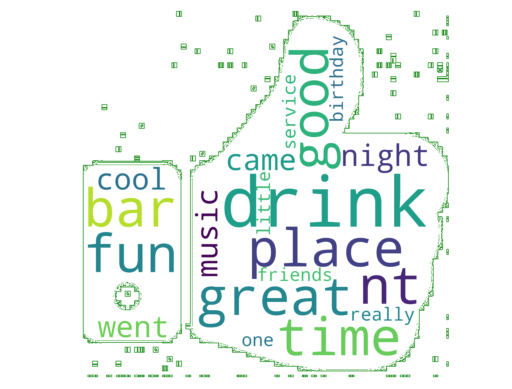

In [17]:
# generate a wordcloud from top_words with white background
mask = np.array(Image.open("upvote.png")) # image mask
wordcloud = WordCloud(background_color='white', mask = mask, contour_width=3, contour_color='green').generate(str(top_words).replace("'",''))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # remove the axis
plt.show()

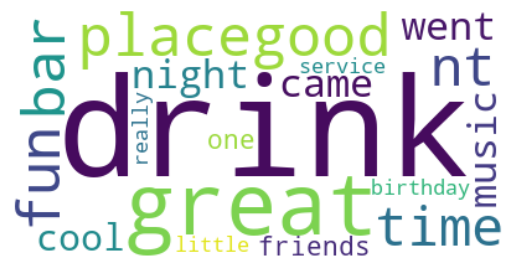

In [18]:
# a simple wordcloud
wordcloud2 = WordCloud(background_color='white').generate(str(top_words).replace("'",''))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off') # remove the axis
plt.show()

## Create a donut chart of the sentiment values for each review using both default and NaiveBayesAnalyzer sentiment values

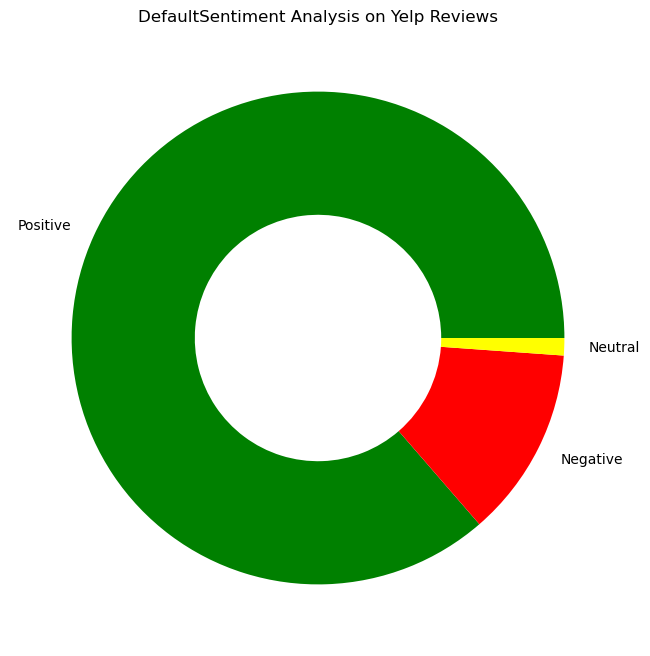

In [19]:
# set values for the plot and label
positive = sentiment_dict['positive']
negative = sentiment_dict['negative']
neutral = sentiment_dict['neutral']
values = [positive, negative, neutral]
labels = ['Positive', 'Negative', 'Neutral']

# plot donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'yellow'])
ax.set_title('Default Sentiment Analysis on Yelp Reviews')

plt.show()

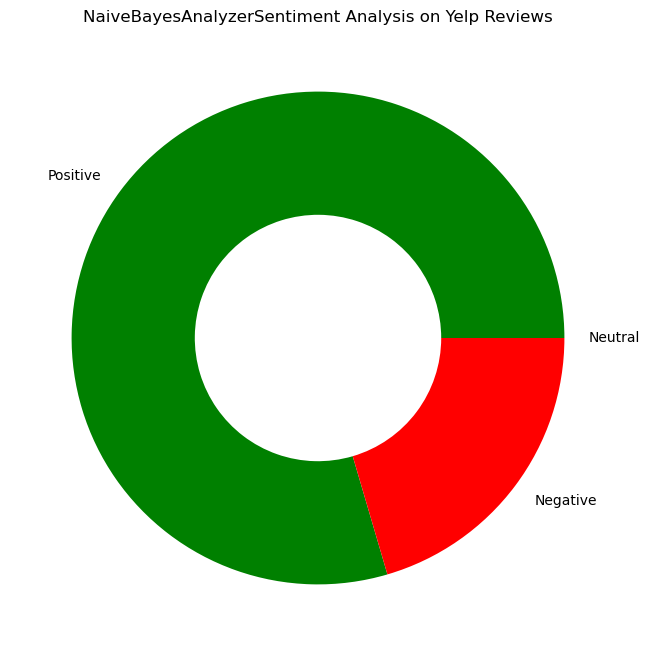

In [20]:
# set values for the plot and label
naive_positive = naive_dict['positive']
naive_negative = naive_dict['negative']
naive_neutral = naive_dict['neutral']
naive_values = [naive_positive, naive_negative, naive_neutral]
labels = ['Positive', 'Negative', 'Neutral']

# plot donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(naive_values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'yellow'])
ax.set_title('NaiveBayesAnalyzer Sentiment Analysis on Yelp Reviews')

plt.show()

In [28]:
print('Default Sentiment Values:\n', sentiment_dict)
print('NaiveBayesAnalyzer Sentiment Values:\n', naive_dict)

Default Sentiment Values:
 {'positive': 76, 'neutral': 1, 'negative': 11}
NaiveBayesAnalyzer Sentiment Values:
 {'positive': 70, 'neutral': 0, 'negative': 18}


### Comparing the above charts it's clear that NaiveBayesAnalyzer showed many more negative reviews than the default analyzer, and it showed no neutral reviews either. You can also see the numbers by printing the dictionaries. The default sentiment is more positive overall.

## Next we'll analyze the dataframe to look at the ratings for each nightclub and determine the top rated clubs and categories

In [21]:
# display the list of business data
summary_list

[{'Name': 'Rooftop 93',
  'Category': ['Lounges', 'Cocktail Bars'],
  'Rating': 4.1},
 {'Name': 'The Village Underground',
  'Category': ['Dance Clubs', 'Lounges', 'Comedy Clubs'],
  'Rating': 4.0},
 {'Name': 'MOON BAR Rooftop', 'Category': ['Lounges'], 'Rating': 4.0},
 {'Name': 'Madame X', 'Category': ['Lounges'], 'Rating': 3.6},
 {'Name': 'Paradise Club', 'Category': ['Bars', 'Cabaret'], 'Rating': 4.2},
 {'Name': 'Strangelove', 'Category': ['Dive Bars'], 'Rating': 4.6},
 {'Name': 'Penthouse Lounge and Bar', 'Category': ['Lounges'], 'Rating': 3.0},
 {'Name': 'Club Cumming',
  'Category': ['Gay Bars', 'Dance Clubs', 'Lounges'],
  'Rating': 4.3},
 {'Name': 'The Upstairs at 66',
  'Category': ['Lounges', 'Arcades', 'Speakeasies'],
  'Rating': 4.8},
 {'Name': 'Space Ping Pong Lounge & Bar',
  'Category': ['Sports Clubs', 'Lounges', 'Arcades'],
  'Rating': 4.2},
 {'Name': "Peachy's", 'Category': ['Cocktail Bars'], 'Rating': 4.0},
 {'Name': 'Bembe', 'Category': ['Dance Clubs'], 'Rating': 3.

In [22]:
# turn the list into a dataframe
df = pd.DataFrame(summary_list)
df

,Name,Category,Rating
0,Rooftop 93,"[Lounges, Cocktail Bars]",4.1
1,The Village Underground,"[Dance Clubs, Lounges, Comedy Clubs]",4.0
2,MOON BAR Rooftop,[Lounges],4.0
3,Madame X,[Lounges],3.6
4,Paradise Club,"[Bars, Cabaret]",4.2
5,Strangelove,[Dive Bars],4.6
6,Penthouse Lounge and Bar,[Lounges],3.0
7,Club Cumming,"[Gay Bars, Dance Clubs, Lounges]",4.3
8,The Upstairs at 66,"[Lounges, Arcades, Speakeasies]",4.8
9,Space Ping Pong Lounge & Bar,"[Sports Clubs, Lounges, Arcades]",4.2


In [23]:
# this turns the list items in category into a single item
#df['Category'] = df['Category'].apply(lambda x: ' '.join(map(str,x)))
#df

In [24]:
df = df.sort_values(by = 'Rating', ascending = False)
df

,Name,Category,Rating
20,Hot Box Girls,"[Performing Arts, Jazz & Blues, Opera & Ballet]",5.0
8,The Upstairs at 66,"[Lounges, Arcades, Speakeasies]",4.8
16,Sunken Harbor Club,"[Cocktail Bars, Tiki Bars]",4.6
5,Strangelove,[Dive Bars],4.6
23,Paradise Lost,"[Cocktail Bars, Tiki Bars]",4.6
18,Swingers Crazy Golf - NoMad,"[Mini Golf, Cocktail Bars, Street Vendors]",4.5
28,Deluxx Fluxx,[Dance Clubs],4.4
22,The Lingerie Shoppe aka Astoria’s Secret,"[Speakeasies, Cocktail Bars]",4.4
13,The Woo Woo,[Speakeasies],4.4
25,HiLot,[Cocktail Bars],4.3


In [25]:
# top 10 rated nightclubs
top_rated = df[:10]
top_rated

,Name,Category,Rating
20,Hot Box Girls,"[Performing Arts, Jazz & Blues, Opera & Ballet]",5.0
8,The Upstairs at 66,"[Lounges, Arcades, Speakeasies]",4.8
16,Sunken Harbor Club,"[Cocktail Bars, Tiki Bars]",4.6
5,Strangelove,[Dive Bars],4.6
23,Paradise Lost,"[Cocktail Bars, Tiki Bars]",4.6
18,Swingers Crazy Golf - NoMad,"[Mini Golf, Cocktail Bars, Street Vendors]",4.5
28,Deluxx Fluxx,[Dance Clubs],4.4
22,The Lingerie Shoppe aka Astoria’s Secret,"[Speakeasies, Cocktail Bars]",4.4
13,The Woo Woo,[Speakeasies],4.4
25,HiLot,[Cocktail Bars],4.3


In [26]:
# group categories based on rating to find the top rated category 
categories = top_rated.groupby(['Rating'])['Category'].sum()
categories

Rating
4.3                                      [Cocktail Bars]
4.4    [Dance Clubs, Speakeasies, Cocktail Bars, Spea...
4.5           [Mini Golf, Cocktail Bars, Street Vendors]
4.6    [Cocktail Bars, Tiki Bars, Dive Bars, Cocktail...
4.8                      [Lounges, Arcades, Speakeasies]
5.0      [Performing Arts, Jazz & Blues, Opera & Ballet]
Name: Category, dtype: object

### This data shows us that out of the 30 nightclubs in New York that we've collected data for, only one has a 5.0 rating. The top categories are Performing Arts, Jazz & Blues, Opera & Ballet, Lounges, Arcades, and Speakeasies